In [4]:
!pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 3.2 MB/s eta 0:00:00


Tải thư viện patool.

In [5]:
import pandas as pd
import numpy as np
import cv2 as cv
from cv2 import imwrite, imread
from matplotlib import pyplot as plt


Import pandas, numpy, thư viện OpenCV. Gọi các hàm imwrite, imread để ghi và đọc hình ảnh từ OpenCV, gọi hàm pylot để vẽ đồ thị và trực quan hóa từ matplotlib


In [19]:
path ="/content/sample_data"
filename = "Lab01 - Image.rar"

Sau khi đã thêm thư mục Lab01 - Image.rar (download từ Drive), gọi path và filename.

In [20]:
import os
import patoolib

os.chdir(path)
patoolib.extract_archive(filename)

INFO patool: Extracting Lab01 - Image.rar ...
INFO:patool:Extracting Lab01 - Image.rar ...
INFO patool: running /usr/bin/unrar x -- "/content/sample_data/Lab01 - Image.rar"
INFO:patool:running /usr/bin/unrar x -- "/content/sample_data/Lab01 - Image.rar"
INFO patool:     with cwd='./Unpack_ak3xmuhg', input=''
INFO:patool:    with cwd='./Unpack_ak3xmuhg', input=''
INFO patool: ... Lab01 - Image.rar extracted to `Sample01'.
INFO:patool:... Lab01 - Image.rar extracted to `Sample01'.


'Sample01'

Giải nén file Lab01 - Image.rar


In [27]:
os.chdir(path + "/Sample01")
os.listdir()

['.ipynb_checkpoints', 'aenami.png', 'cat.jpg', 'coffee.jpg', 'motocycle.jpg']

Liệt kê các file và thư mục con nếu có trong thư mục Sample01

**Choose an image from a list and External image**

In [32]:
List_Img = os.listdir()

In [33]:
print(List_Img[1], List_Img[3])

aenami.png cat.jpg


Gọi ảnh khác ảnh Cat (coffee), và ảnh từ máy theo yêu cầu 2 ( Pick an image from outside the list (any image from your local machine) )

In [34]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):
  # Convert Image Data to list.

  ImageArray = list(ImageData)
  LabelArray = list(LabelData)

  # Figure Image Size.
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize = (20, 20))
  else:
    fig = plt.figure(figsize = (cols * 8, rows * 5))

  # Loop and Display Subplot.
  for i in range(1, cols * rows + 1):
    fig.add_subplot(rows, cols, i)
    image = ImageArray[i - 1]

    # Display image in grayscale or color.
    if(len(image.shape) < 3):
      plt.imshow(image, plt.cm.gray)
      plt.grid(gridType)
    else:
      plt.imshow(image)
      plt.grid(gridType)
    plt.title(LabelArray[i - 1])

  # Display grid.
  plt.show()

Thiết lập hàm imshow để hiển thị lưới và hiển thị ảnh dưới dạng thang xám (grayscale) nếu ảnh có ít hơn 3 kênh, ví dụ ảnh 2D, nếu đủ 3 kênh trở lên sẽ hiển thị ảnh màu.


In [54]:
def ShowFourImages(IM1, IM2, IM3, IM4):
  imshows([IM1, IM2, IM3, IM4], ["Image 1", "Image 2", "Image 3", "Image 4"], 2, 2)
def ShowThreeImages(IM1, IM2, IM3):
  imshows([IM1, IM2, IM3], ["Image 1", "Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
  imshows([IM1, IM2], ["Image 1", "Image 2"], 1, 2)
def ShowOneImages(IM1):
  imshows([IM1], ["Image 1"], 1, 1)

def ShowListImages(listImage, row, col):
  listCaption = []
  for i in range(len(listImage)):
    listCaption.append(str(i))
  imshows(listImage, listCaption, row, col)


Thiết lập các hàm tiện lợi để gọi 1, 2, 3 hoặc 4 ảnh.
Thiết lập hàm hiển thị danh sách hình ảnh bất kì với số hàng và số cột do người dùng tùy chỉnh.

# **Perform operations**

1. **Read and display the image**

In [37]:
img1 = cv.imread("coffee.jpg")
img2 = cv.imread("aenami.png")

height_1, width_1 = img1.shape[:2]
height_2, width_2 = img2.shape[:2]

Đọc 2 ảnh (coffee và aenami), sau đó lấy ra giá trị chiều cao và chiều rộng của ảnh gốc, bỏ qua kênh màu


In [47]:
if img1 is None:
    print("Can not read Image 1")
if img2 is None:
    print("Can not read Image 2")

Điều kiện nếu ảnh không đọc được

2 images :  (183, 275, 3) (667, 1236, 3)


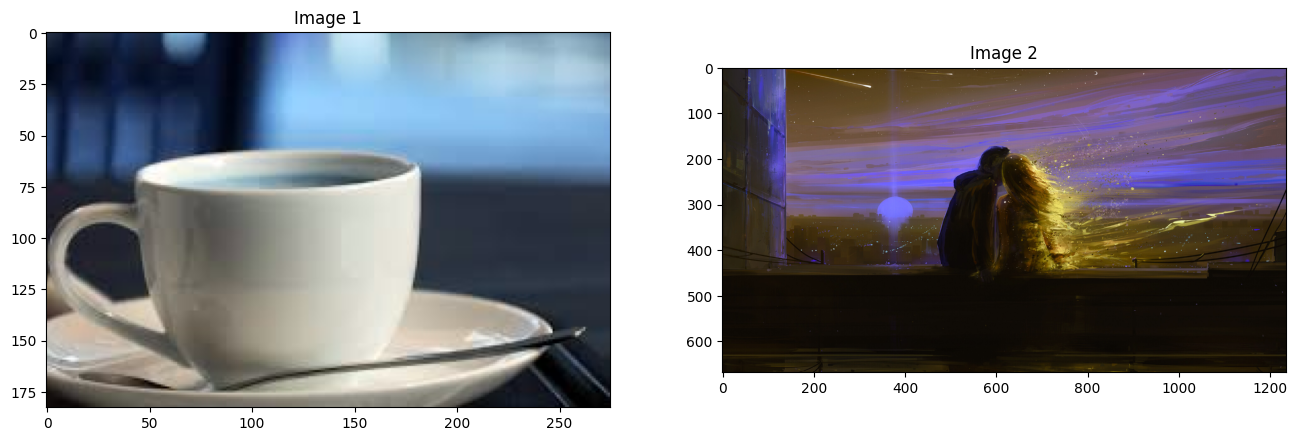

In [51]:
print('Display 2 images : ',img1.shape, img2.shape)
ShowTwoImages(img1, img2)

Display ảnh

**2. Scale the image**

In [61]:
def scale_img(img, scale = None, new_size = None, interpolation = cv.INTER_CUBIC):
  height, width = img.shape[:2]

  if scale is not None:
    scale = tuple(scale)
    res = cv.resize(img, None, fx = scale[0], fy = scale[1], interpolation = interpolation)

  elif new_size is not None:
    res = cv.resize(img, new_size, interpolation = interpolation)

  else:
    raise ValueError("Either scale or new_size must be provided")

  return res

Thiết lập hàm scale_image sử dụng phương pháp nội suy bi_linear.


In [62]:
res1_img1 = scale_img(img1, scale = (10, 10))
res1_img2 = scale_img(img2, scale = (10, 10))


Thay đổi kích thước thành (10, 10) pixels

In [65]:
res2_img1 = scale_img(img1, new_size = (int(0.1 * width_1), int(0.1 * height_1)))
res2_img2 = scale_img(img2, new_size = (int(0.1 * width_2), int(0.1 * height_2)))


Thay đổi kích thước xuống 0.1 lần

Original Dimensions :  (183, 275, 3) (667, 1236, 3)


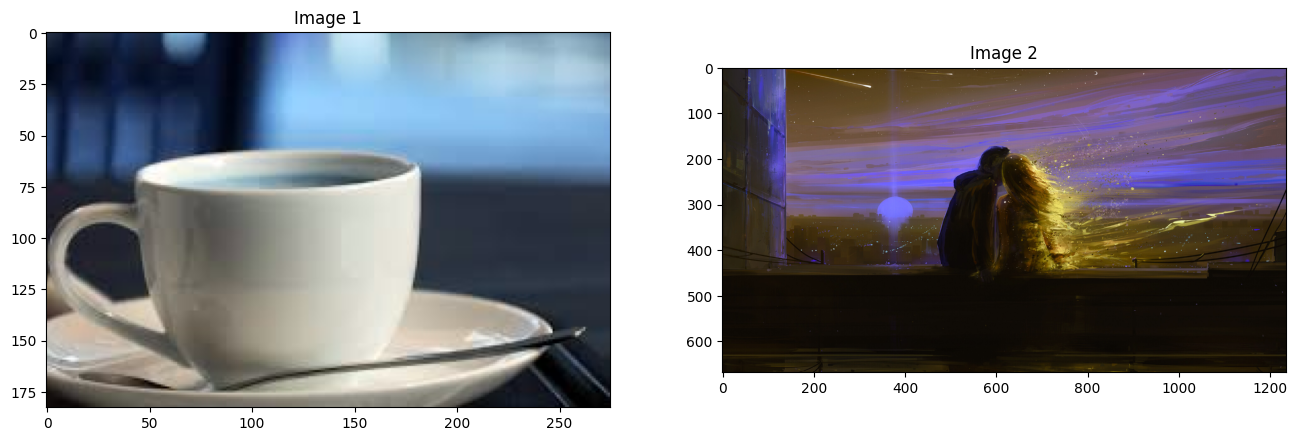

In [66]:
print('Original Dimensions : ',img1.shape, img2.shape)
ShowTwoImages(img1, img2)

Display ảnh ban đầu



Increase Dimensions :  (1830, 2750, 3) (66, 123, 3)


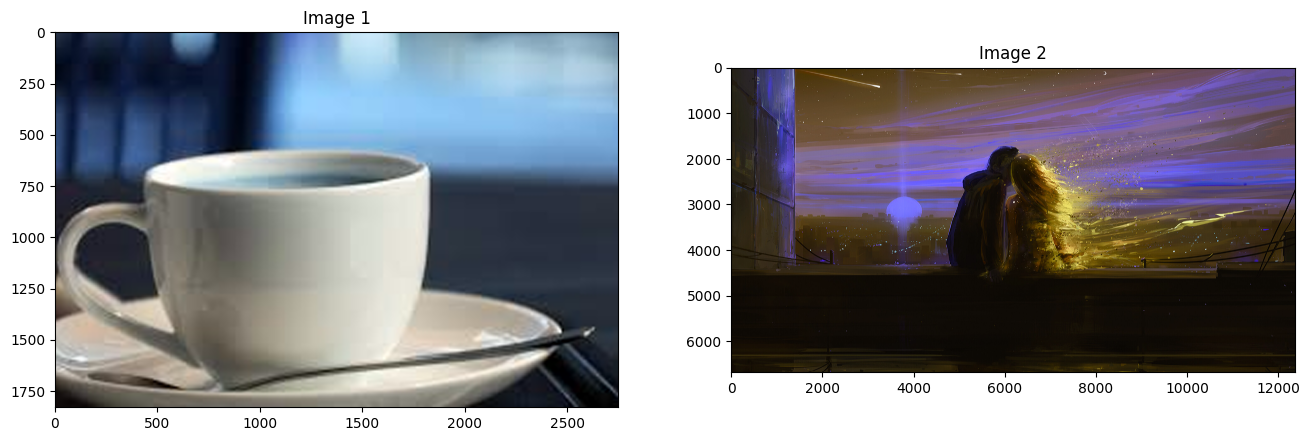

In [68]:
print('Increase Dimensions : ',res1_img1.shape, res2_img2.shape)
ShowTwoImages(res1_img1, res1_img2)

Display ảnh sau khi Scale Up

Reduce Dimensions :  (18, 27, 3) [[[ 37  33  24]
  [ 38  35  28]
  [ 40  36  35]
  ...
  [101  80 148]
  [ 99  78 153]
  [100  80 152]]

 [[ 40  36  24]
  [ 38  35  30]
  [ 41  37  36]
  ...
  [ 99  79 154]
  [ 99  80 153]
  [ 97  79 126]]

 [[ 40  37  27]
  [ 40  37  29]
  [ 39  36  36]
  ...
  [ 93  75 105]
  [ 94  74 104]
  [ 92  75 116]]

 ...

 [[ 22  16   5]
  [ 23  16   6]
  [ 21  14   6]
  ...
  [ 17  11   6]
  [ 15  11   6]
  [ 17  11   6]]

 [[ 20  13   4]
  [ 35  26   7]
  [ 36  26   7]
  ...
  [ 22  15   7]
  [ 19  14   6]
  [ 17  14   7]]

 [[ 19  11   4]
  [ 23  17   6]
  [ 23  16   7]
  ...
  [ 28  19   8]
  [ 19  13   6]
  [ 18  14   7]]]


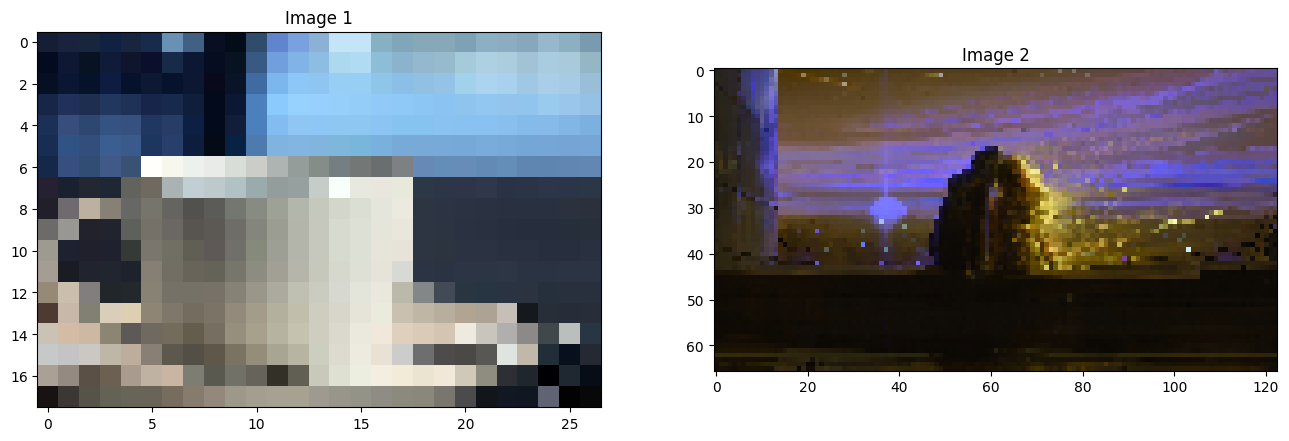

In [70]:
print('Reduce Dimensions : ',res2_img1.shape, res2_img2)
ShowTwoImages(res2_img1, res2_img2)

Display ảnh sau khi Scale Down


**3. Rotate the image**


In [71]:
# Function Rotate image:

def rotate_img(image, angle):
  (h, w) = image.shape[:2]
  center = (w//2 , h//2)
  rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)
  rotated_image = cv.warpAffine(image, rotation_matrix, (w, h))
  return rotated_image

rotated_1 = rotate_img(img1, 90)
rotated_2 = rotate_img(img2, 180)

Thiết lập hàm rotate_img để xoay hình ảnh và sử dụng Rotation Matrix để xoay ảnh 1 90 độ và ảnh 2 180 độ.


rotated Dimensions :  (183, 275, 3)
rotated Dimensions :  (667, 1236, 3)


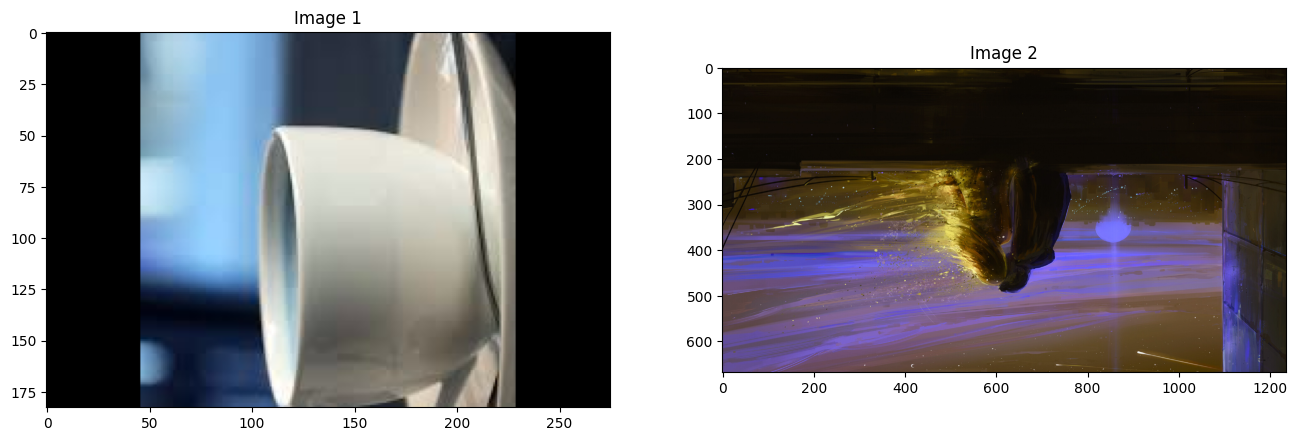

In [72]:
print('rotated Dimensions : ',rotated_1.shape)
print('rotated Dimensions : ',rotated_2.shape)
ShowTwoImages(rotated_1, rotated_2)

Display ảnh sau khi Rotate

**4. Translate the image (shift its position)**

In [73]:
# Function Translation shift image
def translate_image(image, x_shift, y_shift):
    (h, w) = image.shape[:2]
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    translated_image = cv.warpAffine(image, translation_matrix, (w, h))
    return translated_image

dst1 = translate_image(img1, 100, 50)
dst2 = translate_image(img2, 50, 25)


Thiết lập hàm translate_img để dịch chuyển hai hình ảnh, sử dụng ma trận dịch M[tx,ty] và hàm warpAffine của opencv, Dịch chuyển img1 100 pixels sang phải và 50 pixels xuống, Dịch chuyển img2 50 pixels sang phải và 25 pixels xuống


Shift Dimensions :  (183, 275, 3) (667, 1236, 3)


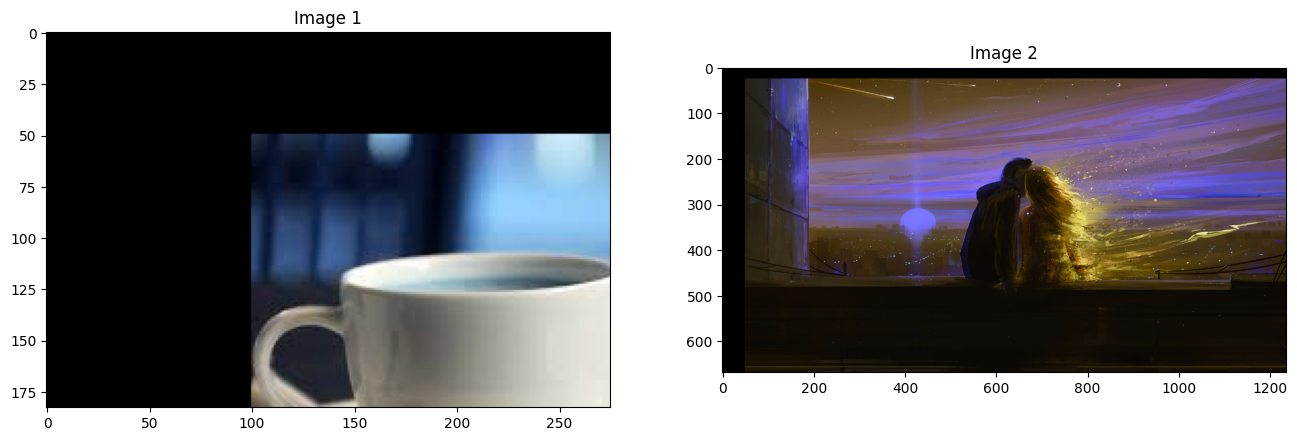

In [79]:
print('Shift Dimensions : ',dst1.shape, dst2.shape)
ShowTwoImages(dst1, dst2)

Display ảnh sau khi shift


**5. Apply Affine Transformation to the image**

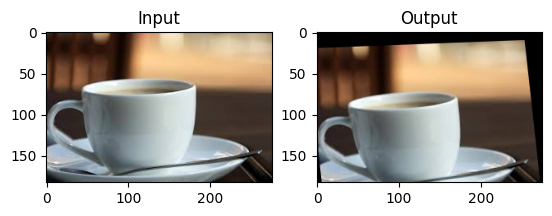

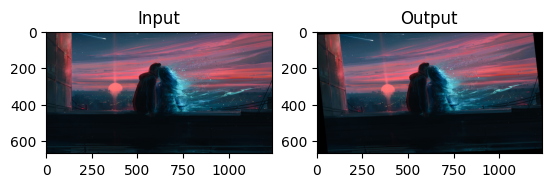

In [86]:
def affine_transform(image, pts1, pts2):
  rows, cols, ch = image.shape

  # Compute the affine transform matrix
  M = cv.getAffineTransform(np.float32(pts1), np.float32(pts2))

  # Apply the affine transformation
  at = cv.warpAffine(image, M, (cols, rows))

  # Display the input and output images
  plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Input')
  plt.subplot(122), plt.imshow(cv.cvtColor(at, cv.COLOR_BGR2RGB)), plt.title('Output')
  plt.show()

  return at

pts1 = [[30, 30], [300, 30], [30, 300]]
pts2 = [[20, 50], [280, 40], [50, 320]]
aff_1 = affine_transform(img1, pts1, pts2)
aff_2 = affine_transform(img2, pts1, pts2)

Thết lập hàm affine_transform với 3 điểm đầu vào muốn biến đổi thành 3 điểm đầu ra muốn biến thành, display ảnh, ảnh có màu vì thuộc tính shape có kênh màu ch


**6. Làm thêm**

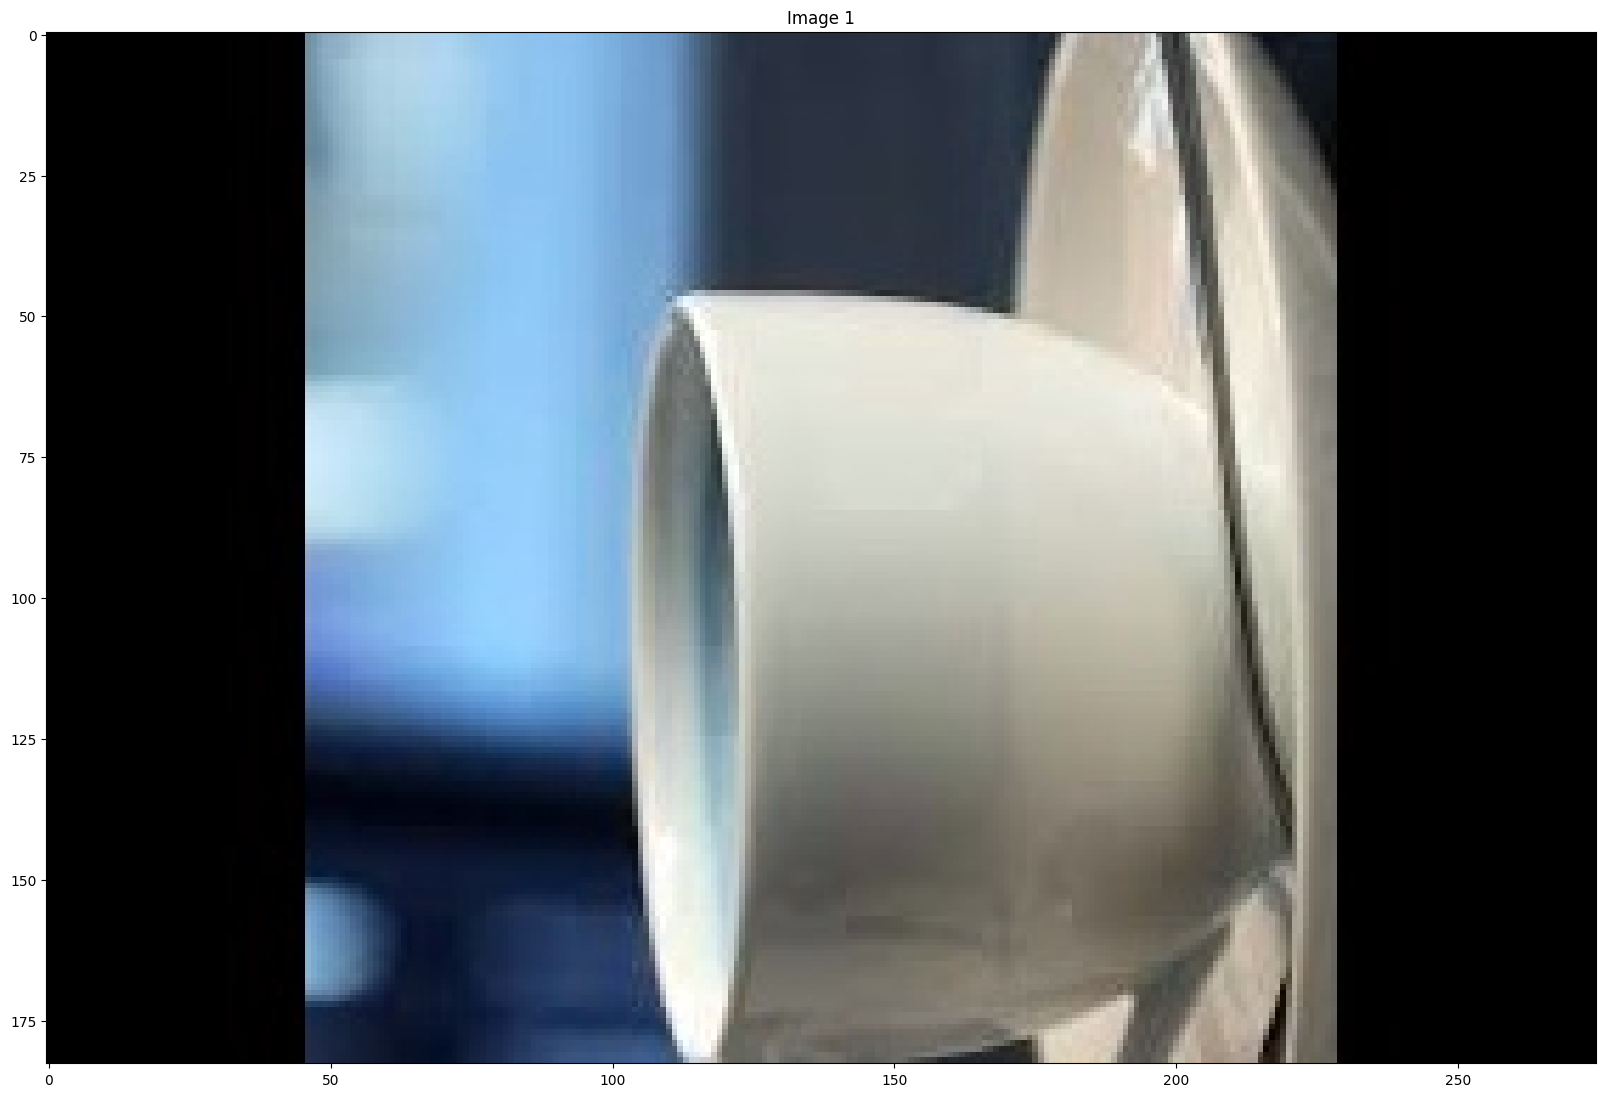

In [94]:
cv.imwrite('coffee.jpg', rotated_1)
rotated2 = cv.imread('coffee.jpg',cv.COLOR_BGR2RGB)
ShowOneImages(rotated2)

In [91]:
cv.imwrite('coffee.jpg', rotated_1, [int(cv.IMWRITE_JPEG_QUALITY), 90])

# Read the saved image
rotated = cv.imread('coffee.jpg')

# Convert the image from BGR to RGB (for displaying with matplotlib)
rotated_rgb = cv.cvtColor(rotated, cv.COLOR_BGR2RGB)

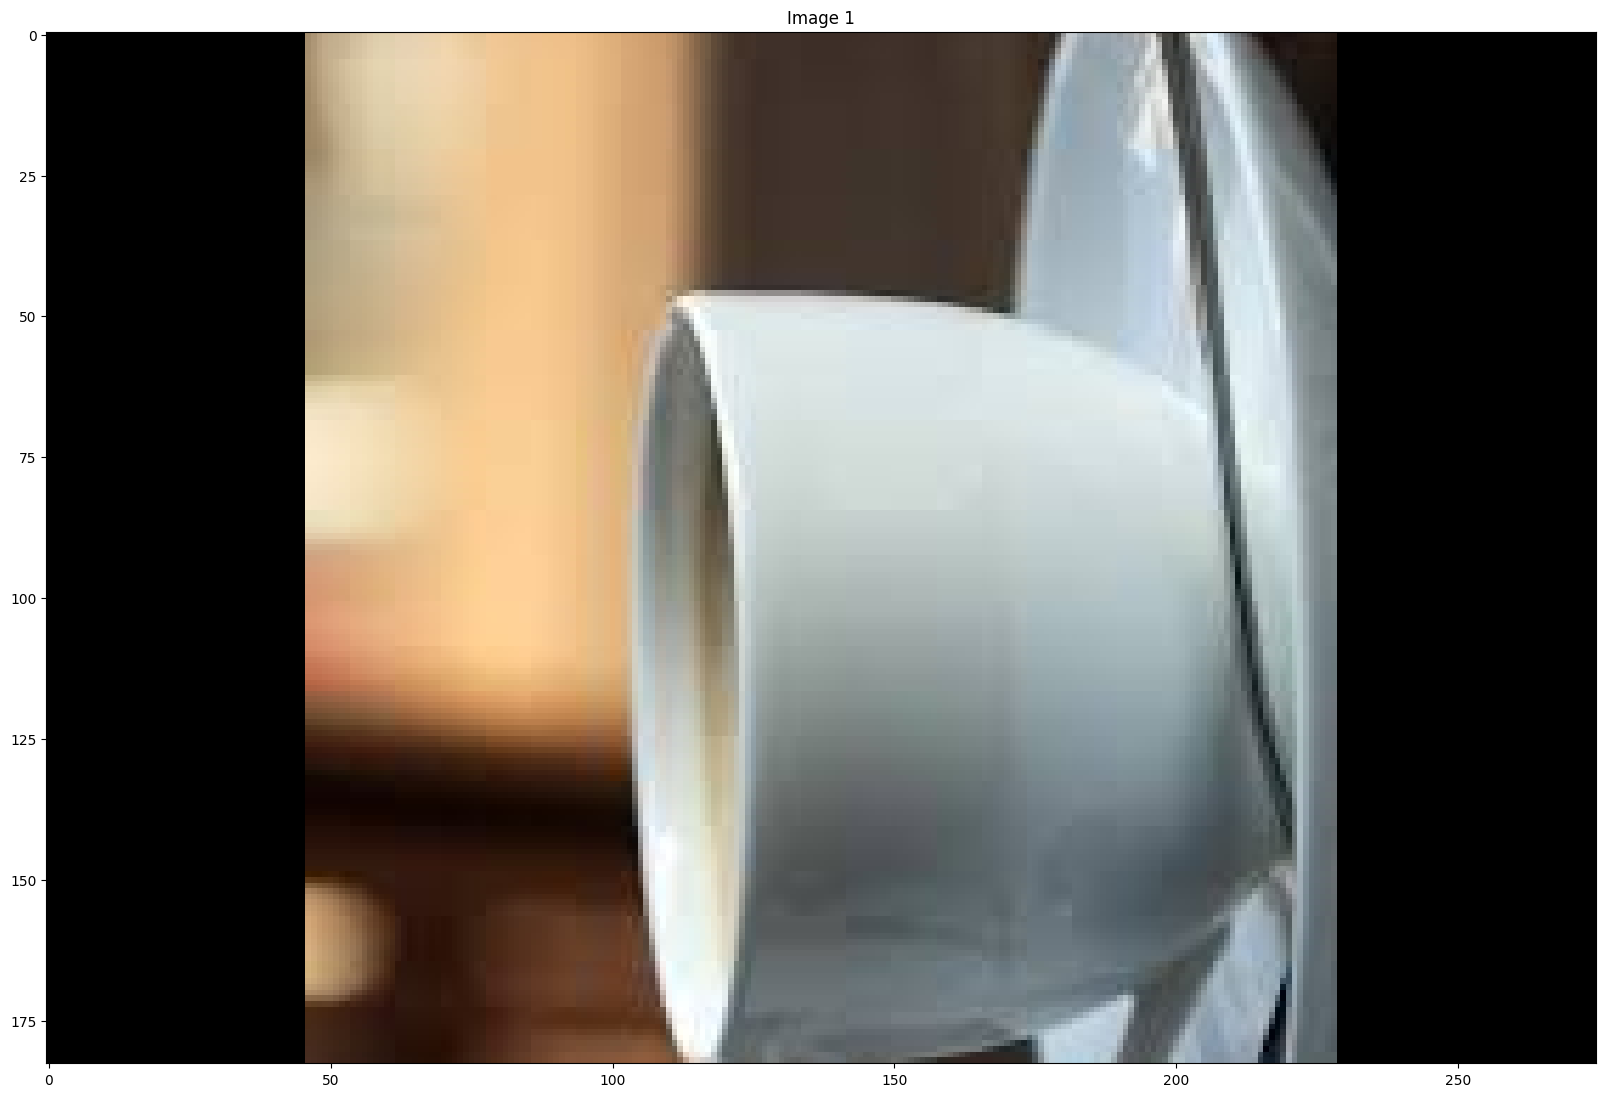

In [93]:
ShowOneImages(rotated_rgb)